**Zadanie 6 Laboratorium Statystycznej Eksploracji Danych**

**Autor:** Mateusz Wasiluk

**Cel ćwiczenia:** Sprawdzenie skuteczności klasyfikatora SVM dla różnych wartości parametru C i porównanie z klasyfikatorem LDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

Generowanie danych z dwuwymiarowych rozkładów normalnych

In [2]:
S = np.array([[4, 2],[2, 4]]) 

m1 = np.array([-1,-1]) 
m2 = np.array([2,2])

n1=30 
n2=20

class1 = np.random.multivariate_normal(m1, S, n1) 
class2 = np.random.multivariate_normal(m2, S, n2)

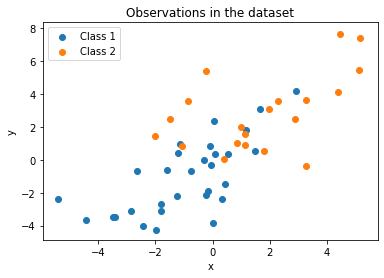

In [3]:
fig, ax = plt.subplots(); 
ax.scatter(class1[:,0], class1[:,1], label='Class 1');
ax.scatter(class2[:,0], class2[:,1], label='Class 2');
ax.set_xlabel('x'); 
ax.set_ylabel('y');
ax.set_title('Observations in the dataset')
ax.legend()
plt.show()

In [4]:
data = np.append(class1, class2, axis=0)

In [5]:
y = [0 for _ in range(n1)]
y += [1 for _ in range(n2)]

In [6]:
c_vals = [n/10 for n in range(1, 11)]

In [7]:
c_vals

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Przygotowanie klasyfikatorów i ich testy

In [8]:
svm_scores = []
svm_scores_stds = []
for c in c_vals:
    clf = SVC(gamma='auto', C=c)
    clf.fit(data, y)
    clf_cv = cross_val_score(clf, data, y, cv=10)
    svm_scores.append(np.mean(clf_cv))
    svm_scores_stds.append(np.std(clf_cv))

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(data, y)
cv_lda = cross_val_score(lda, data, y, cv=10)
lda_score = np.mean(cv_lda)
lda_std = np.std(cv_lda)

Porównanie skuteczności klasyfikatorów na wykresie

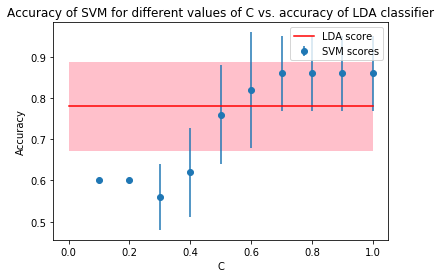

In [10]:
fig, ax = plt.subplots(); 
ax.errorbar(c_vals, svm_scores, yerr=svm_scores_stds, linestyle=None, fmt='o', label='SVM scores');

lda_x = [0,1]
lda_y = [lda_score, lda_score]
ax.plot(lda_x, lda_y, label='LDA score', c='r')
ax.fill_between(lda_x, lda_y-lda_std, lda_y+lda_std, facecolor='pink')
ax.set_xlabel('C'); 
ax.set_ylabel('Accuracy');
ax.set_title('Accuracy of SVM for different values of C vs. accuracy of LDA classifier')
ax.legend()
plt.show()

Obserwacje i wnioski: Skuteczność klasyfikatora SVM wyraźnie zależy od wartości parametru C. W zakresie odchylenia standardowego wyników walidacji krzyżowej minimalną wartością C, przy której skuteczność SVM dorównuje skuteczności LDA jest 0.4. Ponieważ im mniejsza wartość C tym mniejsze ryzyko przetrenowaniu algorytmu, tę wartość lub nieco wyższą (0.5) należałoby wybrać, aby móc oczekiwać porównywalnych wyników metryk klasyfikacji SVM i LDA.
